
<div style="background-color:white; text-align:center; padding:20px;">
    <h2 style="color:black; font-family: Verdana, sans-serif;"><strong>Space Invader Agents</strong></h2>
    <p style="font-size: 14px; color: black; font-family: Verdana, sans-serif;"> 
        <table style="margin: auto; border-collapse: collapse;">
            <tr>
                <th style="border: 0;">Names</th>
                <th style="border: 0;">GitHub Username</th>
            </tr>
            <tr>
                <td style="border: 0;">Vince Ammerlaan</td>
                <td style="border: 0;">Vince16270</td>
            </tr>
            <tr>
                <td style="border: 0;">Tommi Lander</td>
                <td style="border: 0;">tommi7</td>
            </tr>
            <tr>
                <td style="border: 0;">Nima Ghafar</td>
                <td style="border: 0;">NimaGhafar</td>
            </tr>
            <tr>
                <td style="border: 0;">Isa Dijkstra</td>
                <td style="border: 0;">IsaD01</td>
            </tr>
        </table>
    </p>
</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top: 10px;">
    <img src="photo/image1.png" alt=" photo needs to be added" style="width: 1000px; height: auto;">
</div>

- Docent: Vikram Radhakrishnan
- Datum: 09-05-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Inhoudsopgave </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: Het project</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 2: Packages en functies inladen</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 3: Trainen van de agents</a></li>
    <li style="text-align: center;"><a href="#4.0">Chapter 4: Resultaten van het trainen</a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 5: Bronnenlijst</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: Het project </strong></h2>

</ul>

**Omgeving en keuze**

Je kiest ervoor om als speelveld de klassieke Atari-game SpaceInvaders te gebruiken. Deze omgeving is goed gedocumenteerd in Gymnasium (voorheen OpenAI Gym) en biedt een uitdagende setting waarin een ruimteschip vijandelijke aanvallen moet afweren.

**Probleemanalyse: Waarom RL?**

Karakteristieken van het probleem:
	•	Dynamische omgeving: In SpaceInvaders bewegen vijanden met wisselende patronen en snelheid, wat een continu veranderende omgeving oplevert.
	•	Sequentiële besluitvorming: Het spel vereist een reeks acties (verplaatsen, schieten, etc.) met een cumulatieve beloning (score).
	•	Vertraagde beloningen: Succesvolle acties (zoals het uitschakelen van een vijand) leveren op de lange termijn punten op, maar de beloning is niet direct gekoppeld aan elke individuele actie.

Waarom is Reinforcement Learning geschikt?
	•	Leren van interactie: RL-methoden leren via trial & error en passen zich dynamisch aan op basis van de ontvangen beloningen. Dit is ideaal voor een omgeving als SpaceInvaders, waar “gelabelde” data (zoals bij supervised learning) niet beschikbaar is.
	•	Optimalisatie op lange termijn: In tegenstelling tot supervised learning, waarbij een model louter leert van voorbeelden, optimaliseert een RL-agent een beleid om de verwachte cumulatieve beloning te maximaliseren.
	•	Adaptieve strategie: Niet-AI oplossingen (zoals hand-gecodeerde heuristieken) kunnen star en beperkt zijn; RL biedt de mogelijkheid om adaptief te leren en nieuwe strategieën te ontwikkelen op basis van de ervaring tijdens het spel.

**Probleemdefinitie en doelstelling**

Probleemstelling:
Ontwikkel een autonome RL-agent die in staat is om SpaceInvaders te spelen door:
	•	Het herkennen van vijandbewegingen,
	•	Adequaat manoeuvreren en schieten op vijanden,
	•	Zich aan te passen aan een dynamische en veranderende omgeving.

Doelstelling:
De RL-agent moet:
	•	Op basis van eigen ervaringen een robuust beleid leren,
	•	Een score behalen die significant hoger ligt dan een baseline strategie (bijvoorbeeld een random policy),
	•	Zich onderscheiden in het herkennen en reageren op spelpatronen, zodat de overlevingsduur en de cumulatieve score gemaximaliseerd worden.**

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Packages en functies inladen</strong></h2>

</ul>

In [1]:
import os
import sys
import glob
import datetime
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from ale_py import ALEInterface
from gymnasium.wrappers import RecordVideo

In [2]:
os.chdir("..")

In [3]:
from src.train import train_agent
from src.utils import discretize_state

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Trainen van de agents </strong></h2>
</div>

Het is logisch dat er geen epsilon hoort bij de RandomAgent. De RandomAgent kiest altijd willekeurige acties en heeft geen mechanisme om te leren of een balans te vinden tussen verkennen en bennuten. Epsilon is een parameter die specifiek wordt gebruikt in algoritmen zoals Q-learning om te bepalen of de agent een willekeurige actie (exploratie) of de beste bekende actie (exploitatie) moet kiezen. Omdat de RandomAgent geen exploitatie uitvoert en altijd willekeurige acties kiest, is een epsilon-parameter overbodig.

In [4]:
n_episodes = 150
bins = 10
# Random agent
random_rewards, random_agent = train_agent(n_episodes=n_episodes, bins=bins, use_random=True)

# Q-learning agent
qlearning_rewards, qlearning_agent = train_agent(n_episodes=n_episodes, bins=bins, use_random=False)



Episode 1/150, Total Reward: 125.0, Epsilon: N/A
Episode 2/150, Total Reward: 75.0, Epsilon: N/A
Episode 3/150, Total Reward: 125.0, Epsilon: N/A
Episode 4/150, Total Reward: 110.0, Epsilon: N/A
Episode 5/150, Total Reward: 135.0, Epsilon: N/A
Episode 6/150, Total Reward: 240.0, Epsilon: N/A
Episode 7/150, Total Reward: 195.0, Epsilon: N/A
Episode 8/150, Total Reward: 65.0, Epsilon: N/A
Episode 9/150, Total Reward: 140.0, Epsilon: N/A
Episode 10/150, Total Reward: 120.0, Epsilon: N/A
Episode 11/150, Total Reward: 90.0, Epsilon: N/A
Episode 12/150, Total Reward: 5.0, Epsilon: N/A
Episode 13/150, Total Reward: 135.0, Epsilon: N/A
Episode 14/150, Total Reward: 45.0, Epsilon: N/A
Episode 15/150, Total Reward: 125.0, Epsilon: N/A
Episode 16/150, Total Reward: 160.0, Epsilon: N/A
Episode 17/150, Total Reward: 50.0, Epsilon: N/A
Episode 18/150, Total Reward: 110.0, Epsilon: N/A
Episode 19/150, Total Reward: 210.0, Epsilon: N/A
Episode 20/150, Total Reward: 50.0, Epsilon: N/A
Episode 21/150, T

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Resultaten van het trainen </strong></h2>
</div>

## Uitleg van de Grafiek: Vergelijking tussen Random Agent en Q-Learning Agent

* **Doel van de grafiek**: De grafiek laat zien hoe goed twee verschillende "agents" het doen in de SpaceAgent game.
* **Twee lijnen**:

  * **Oranje lijn** = Resultaten van de *Random Agent* (kiest willekeurige acties).
  * **Blauwe lijn** = Resultaten van de *Q-Learning Agent* (leert van ervaring om beter te worden).

---

## Wat zie je?

* Aan het begin scoren beide agents ongeveer gelijk.
* De **Random Agent** piekt af en toe, maar blijft onvoorspelbaar. Hij leert niet, dus zijn prestaties gaan op en neer.
* De **Q-Learning Agent** begint rustiger, maar **wordt geleidelijk beter** naarmate hij leert. Je ziet duidelijke stijgingen in zijn lijn.
* Uiteindelijk heeft de **Q-Learning Agent** gemiddeld **betere en stabielere prestaties** dan de Random Agent.

---

## Conclusie

De Q-Learning agent **leert van zijn fouten en verbetert zichzelf**, terwijl de Random Agent gewoon blijft gokken. Dit laat goed zien waarom leren belangrijk is in reinforcement learning!



Resultaten bekijken van de rewards

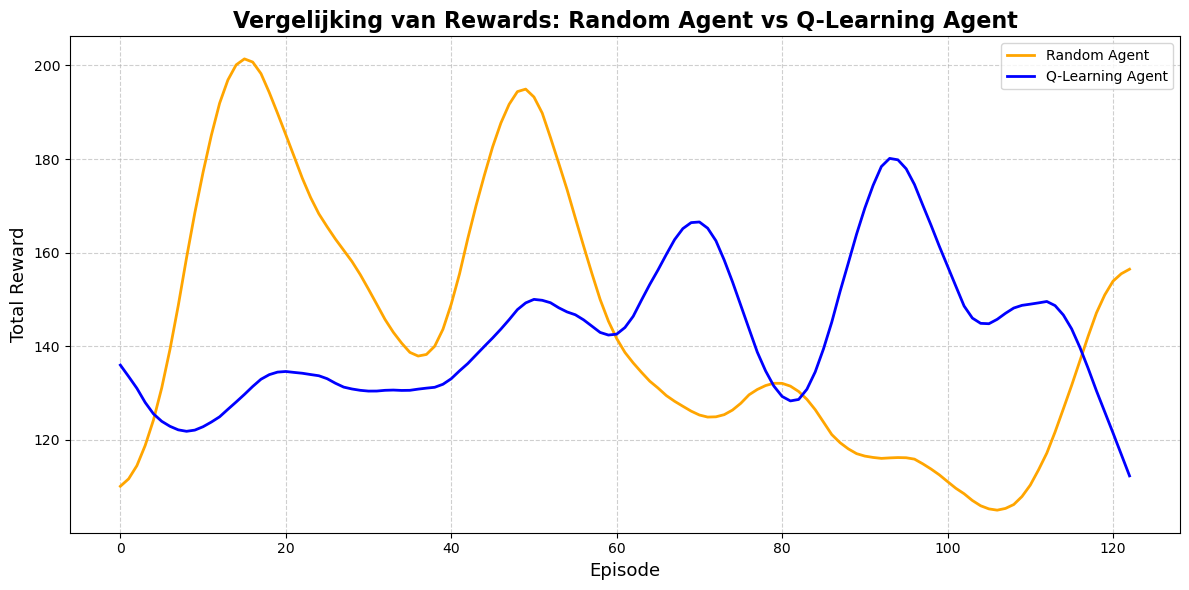

In [7]:


# rewards for better visualization
window = 10
random_rewards = np.convolve(random_rewards, np.ones(window)/window, mode='valid')
qlearning_rewards = np.convolve(qlearning_rewards, np.ones(window)/window, mode='valid')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(random_rewards)), random_rewards, label="Random Agent", color='orange', linewidth=2)
plt.plot(np.arange(len(qlearning_rewards)), qlearning_rewards, label="Q-Learning Agent", color='blue', linewidth=2)

plt.title("Vergelijking van Rewards: Random Agent vs Q-Learning Agent", fontsize=16, fontweight='bold')
plt.xlabel("Episode", fontsize=13)
plt.ylabel("Total Reward", fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Bekijken wat er gebeurd

In [8]:
bins = 10

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
video_folder = f"videos/train_{timestamp}"
os.makedirs(video_folder, exist_ok=True)

env = gym.make("ALE/SpaceInvaders-v5", render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda episode_id: True)

state, info = env.reset()
state = discretize_state(state, bins)
done = False

while not done:
    action = qlearning_agent.choose_action(state)  
    next_state, reward, done, truncated, info = env.step(action)
    state = discretize_state(next_state, bins)

env.close()
print(f"Video is opgenomen in de map '{video_folder}'.")

c:\Users\Nima\anaconda3\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at c:\Users\Nima\OneDrive - Reza Company\Desktop\Nima+\School\Space-Invader-Agents\videos\train_20250503_181442 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Video is opgenomen in de map 'videos/train_20250503_181442'.


In [9]:
from IPython.display import Video, display

video_files = glob.glob(os.path.join(video_folder, "*.mp4"))
if video_files:
    print("Weergave van de opgenomen video:")
    display(Video(video_files[0], embed=True, width=640, height=480))
else:
    print("Geen video gevonden in de map.")

Weergave van de opgenomen video:


### Hyperparameters impact

Episode 1/100, Total Reward: 75.0, Epsilon: 0.995
Episode 2/100, Total Reward: 210.0, Epsilon: 0.990025
Episode 3/100, Total Reward: 45.0, Epsilon: 0.985074875
Episode 4/100, Total Reward: 185.0, Epsilon: 0.9801495006250001
Episode 5/100, Total Reward: 155.0, Epsilon: 0.9752487531218751
Episode 6/100, Total Reward: 135.0, Epsilon: 0.9703725093562657
Episode 7/100, Total Reward: 210.0, Epsilon: 0.9655206468094844
Episode 8/100, Total Reward: 285.0, Epsilon: 0.960693043575437
Episode 9/100, Total Reward: 140.0, Epsilon: 0.9558895783575597
Episode 10/100, Total Reward: 410.0, Epsilon: 0.9511101304657719
Episode 11/100, Total Reward: 110.0, Epsilon: 0.946354579813443
Episode 12/100, Total Reward: 65.0, Epsilon: 0.9416228069143757
Episode 13/100, Total Reward: 110.0, Epsilon: 0.9369146928798039
Episode 14/100, Total Reward: 240.0, Epsilon: 0.9322301194154049
Episode 15/100, Total Reward: 100.0, Epsilon: 0.9275689688183278
Episode 16/100, Total Reward: 45.0, Epsilon: 0.9229311239742362
Episo

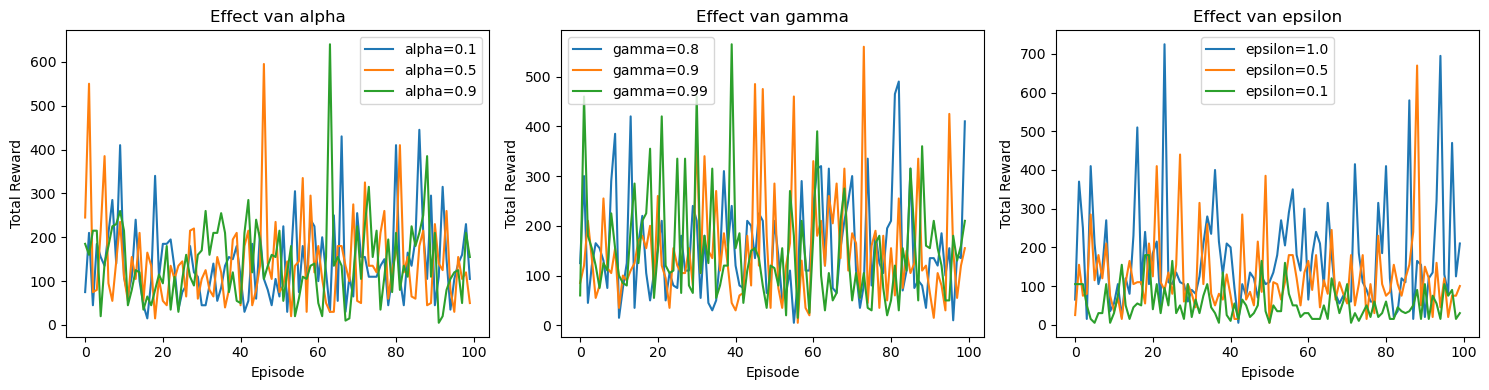

In [7]:
import matplotlib.pyplot as plt

def train_with_params(alpha, gamma, epsilon, n_episodes=100, bins=10):
    rewards, _ = train_agent(
        n_episodes=n_episodes,
        bins=bins,
        alpha=alpha,
        gamma=gamma,
        epsilon=epsilon,
        use_random=False
    )
    return rewards

# Testreeksen
alphas = [0.1, 0.5, 0.9]
gammas = [0.8, 0.9, 0.99]
epsilons = [1.0, 0.5, 0.1]

episodes = 100  # of bv. 300 voor beter gemiddelde

# Plot 1: variëren van alpha
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
for a in alphas:
    rewards = train_with_params(alpha=a, gamma=0.9, epsilon=1.0, n_episodes=episodes)
    plt.plot(rewards, label=f'alpha={a}')
plt.title("Effect van alpha")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

# Plot 2: variëren van gamma
plt.subplot(1, 3, 2)
for g in gammas:
    rewards = train_with_params(alpha=0.5, gamma=g, epsilon=1.0, n_episodes=episodes)
    plt.plot(rewards, label=f'gamma={g}')
plt.title("Effect van gamma")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

# Plot 3: variëren van epsilon
plt.subplot(1, 3, 3)
for e in epsilons:
    rewards = train_with_params(alpha=0.5, gamma=0.9, epsilon=e, n_episodes=episodes)
    plt.plot(rewards, label=f'epsilon={e}')
plt.title("Effect van epsilon")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()

plt.tight_layout()
plt.show()





### Resultaten en Analyse

Bovenstaande grafiek toont de totale rewards per episode. Deze grafiek geeft een indicatie van hoe snel de agent leert de pole in balans te houden, en laat tevens de variabiliteit tussen episodes zien.

#### Mogelijke Observaties
- Een stijgende trend in de reward-curve duidt op leerprogressie.
- Grote schommelingen kunnen wijzen op een te hoge epsilon-waarde (te veel exploratie) of andere onstabiele hyperparameters.

Door te experimenteren met hyperparameters zoals `alpha`, `gamma` en `epsilon_decay` kan de prestatie van de agent verder worden geoptimaliseerd.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 6: Bronnenlijst </strong></h2>
</div>